`Name: Nitin Kumar Singh`

`LinkedIn: https://www.linkedin.com/in/nitinsingh2706/`

### Task #1: Predict the percentage of a student based on the no. of study hours.

This is a simple linear regression task as it involves just 2 variables.You can use R, Python, SAS Enterprise Miner or any other tool.

`Q: What will be predicted score if a student studies for 9.25 hrs/ day?`

#### Linear Regression:
Linear regression is a statistical method for modelling relationship between a dependent variable with a given set of independent variables.

In this given task I'll be performing Simple Linear Regression. Simple linear regression is an approach for predicting a response using a single feature. So, I'll be using number of study hours of a student to predict the percentage.

In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
## reading the data

data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Here, we have successfully uploaded our data and can see our dataset has two columns Hours and Scores(in percent).

In [3]:
## checking for shape and datatypes of the dataset

print("Shape of dataset: ",data.shape)
print()

print("Datatypes of the dataset:")
print(data.dtypes)

Shape of dataset:  (25, 2)

Datatypes of the dataset:
Hours     float64
Scores      int64
dtype: object


From the above outputs, we can observe shape of our dataset, like this dataset has 25 rows and 2 columns. Hour column is float64 type and Score is int64 type.

In [4]:
## checking for duplicates

data.duplicated().sum()

0

No, duplicates found in our dataset.

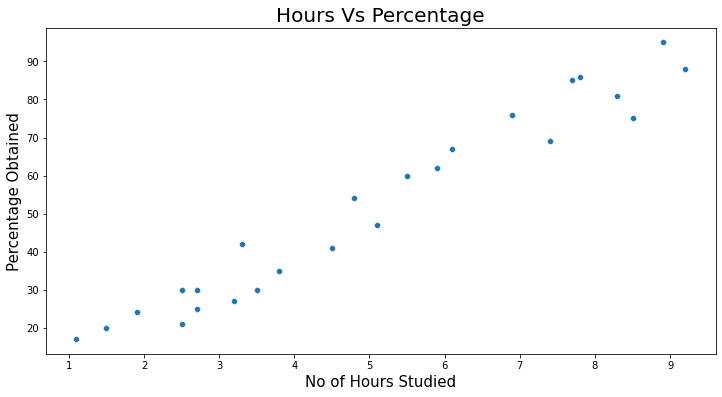

In [5]:
## plotting the distribution of datset using seaborn

plt.figure(figsize=(12,6))
ax = sns.scatterplot(x=data['Hours'], y=data['Scores'])
ax.set_xlabel('No of Hours Studied',fontdict={'fontsize' : 15})
ax.set_ylabel('Percentage Obtained',fontdict={'fontsize' : 15})
ax.set_title("Hours Vs Percentage",fontdict={'fontsize' : 20})
plt.show()

So, here we can observe clearly, there is a linear relationship between Hours and Percentage. More study more better percentage.

In [6]:
## checking for correlation

corr= pearsonr(data['Hours'], data['Scores'])
print("Correlation between Hours and Scores is: %.2f" %corr[0])

Correlation between Hours and Scores is: 0.98


In [7]:
## separating target variable and independent variable

x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [8]:
## performing train-test split to train our model

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
## implementing linear regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
## checking coeffcient and intercept

print("Coefficient: ", lr.coef_[0])
print("Intercept: ", lr.intercept_)

Coefficient:  9.910656480642237
Intercept:  2.018160041434683


In [11]:
line = lr.coef_[0]*x+lr.intercept_

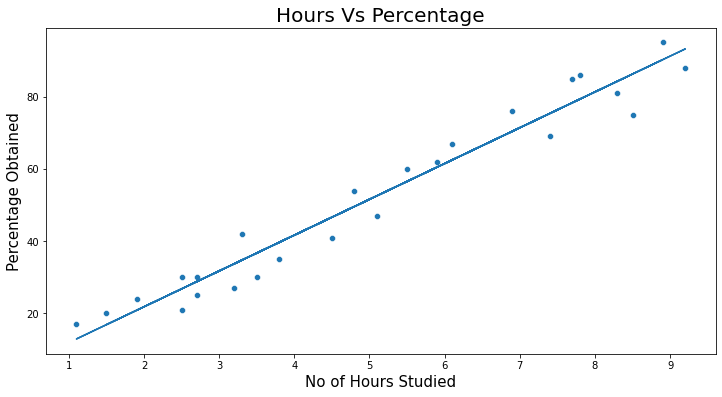

In [12]:
## plotting regression line on the distribution of dataset

plt.figure(figsize=(12,6))
ax = sns.scatterplot(x=data['Hours'], y=data['Scores'])
ax.set_xlabel('No of Hours Studied',fontdict={'fontsize' : 15})
ax.set_ylabel('Percentage Obtained',fontdict={'fontsize' : 15})
ax.set_title("Hours Vs Percentage",fontdict={'fontsize' : 20})
plt.plot(x, line)
plt.show()

In [13]:
## predicting X_test

y_pred = lr.predict(X_test)
print("Prediction values: \n", y_pred)

Prediction values: 
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
## calculating r2

r2 = r2_score(y_test, y_pred)
print("R squre value of the model is: %.3f" %r2)

R squre value of the model is: 0.945


`Q: What will be predicted score if a student studies for 9.25 hrs/ day?`

In [15]:
hrs = [[9.25]]
pred = lr.predict(hrs)

print(f"If a student will study for {hrs}, predicted score will be {pred}")

If a student will study for [[9.25]], predicted score will be [93.69173249]
